In [123]:
import pandas as pd
import numpy as np
import zipfile
import os

import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [124]:
!kaggle datasets download bobnau/daily-website-visitors

Dataset URL: https://www.kaggle.com/datasets/bobnau/daily-website-visitors
License(s): unknown
daily-website-visitors.zip: Skipping, found more recently modified local copy (use --force to force download)


In [126]:
zip_file_path = '/content/daily-website-visitors.zip'
extract_folder = '/content/daily-website-visitors'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

extracted_files = os.listdir(extract_folder)

In [148]:
df = pd.read_csv("/content/daily-website-visitors/daily-website-visitors.csv")
df

,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,1,Sunday,1,9/14/2014,"2,146","1,582","1,430",152
1,2,Monday,2,9/15/2014,"3,621","2,528","2,297",231
2,3,Tuesday,3,9/16/2014,"3,698","2,630","2,352",278
3,4,Wednesday,4,9/17/2014,"3,667","2,614","2,327",287
4,5,Thursday,5,9/18/2014,"3,316","2,366","2,130",236
...,...,...,...,...,...,...,...,...
2162,2163,Saturday,7,8/15/2020,"2,221","1,696","1,373",323
2163,2164,Sunday,1,8/16/2020,"2,724","2,037","1,686",351
2164,2165,Monday,2,8/17/2020,"3,456","2,638","2,181",457
2165,2166,Tuesday,3,8/18/2020,"3,581","2,683","2,184",499


Уберем столбцы, показывающие день и месяц, оставим только полную дату и переведм ее в нужный формат

In [149]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.drop(['Row', 'Day', 'Day.Of.Week'], axis=1)
df

,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,2014-09-14,"2,146","1,582","1,430",152
1,2014-09-15,"3,621","2,528","2,297",231
2,2014-09-16,"3,698","2,630","2,352",278
3,2014-09-17,"3,667","2,614","2,327",287
4,2014-09-18,"3,316","2,366","2,130",236
...,...,...,...,...,...
2162,2020-08-15,"2,221","1,696","1,373",323
2163,2020-08-16,"2,724","2,037","1,686",351
2164,2020-08-17,"3,456","2,638","2,181",457
2165,2020-08-18,"3,581","2,683","2,184",499


Изменим тип данных у трех последних столбцов для дальнейшего анализа

In [150]:
df['Page.Loads'] = df['Page.Loads'].astype(str).str.replace(',', '').astype(float)
df['Unique.Visits'] = df['Unique.Visits'].astype(str).str.replace(',', '').astype(float)
df['First.Time.Visits'] = df['First.Time.Visits'].astype(str).str.replace(',', '').astype(float)
df['Returning.Visits'] = df['Returning.Visits'].astype(str).str.replace(',', '').astype(int)

In [151]:
df.dtypes

,0
Date,datetime64[ns]
Page.Loads,float64
Unique.Visits,float64
First.Time.Visits,float64
Returning.Visits,int64


In [152]:
df['First.Time.Visits'].value_counts()

,count
First.Time.Visits,
3146.0,5
3133.0,5
2377.0,4
2482.0,4
2479.0,4
...,...
2722.0,1
3788.0,1
2777.0,1


## VISUALIZING DATA

In [32]:
df.isnull().sum()

,0
Date,0
Page.Loads,0
Unique.Visits,0
First.Time.Visits,0
Returning.Visits,0


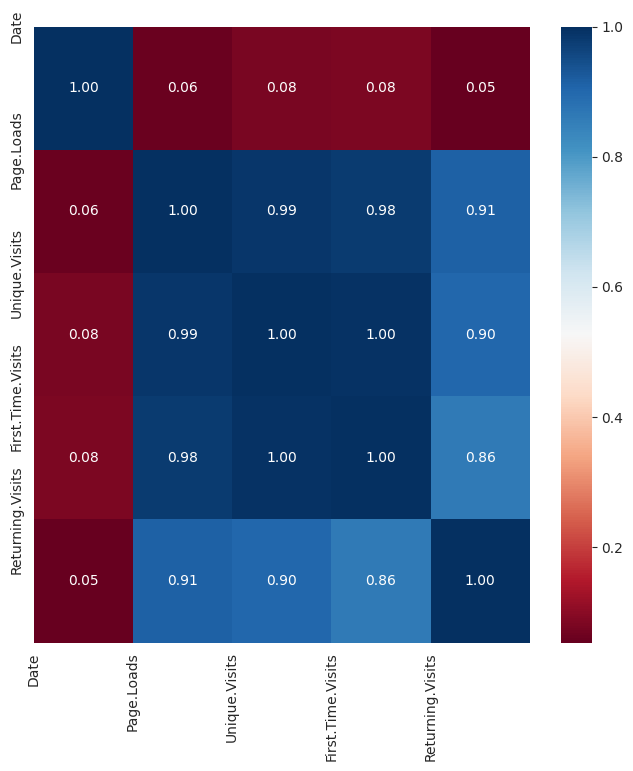

In [33]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)

plt.show()

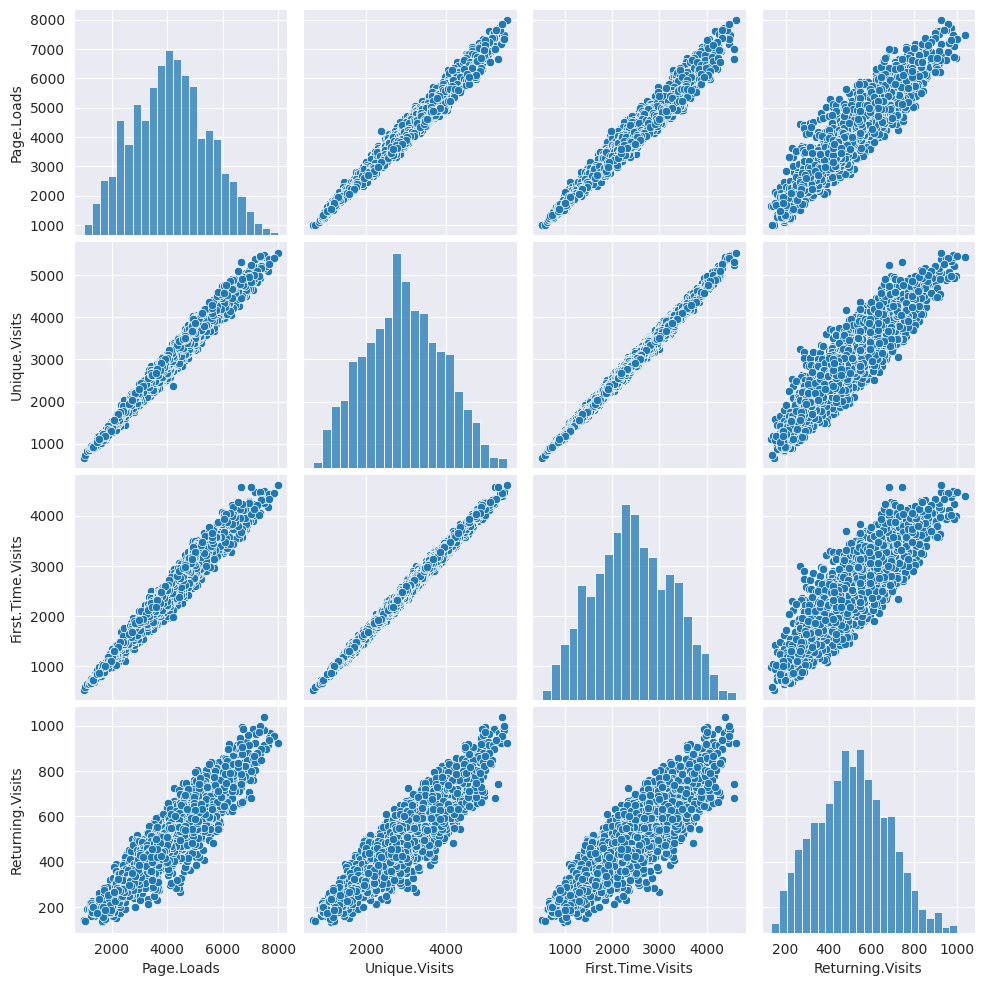

In [34]:
sns.pairplot(df)
plt.show()

In [153]:
df = df[(df['Date'].dt.year >= 2017) & (df['Date'].dt.year <= 2020)].reset_index(drop=True)

In [154]:
df

,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,2017-01-01,1447.0,1039.0,832.0,207
1,2017-01-02,2568.0,1844.0,1448.0,396
2,2017-01-03,3566.0,2527.0,1970.0,557
3,2017-01-04,3941.0,2816.0,2226.0,590
4,2017-01-05,3841.0,2625.0,2058.0,567
...,...,...,...,...,...
1322,2020-08-15,2221.0,1696.0,1373.0,323
1323,2020-08-16,2724.0,2037.0,1686.0,351
1324,2020-08-17,3456.0,2638.0,2181.0,457
1325,2020-08-18,3581.0,2683.0,2184.0,499


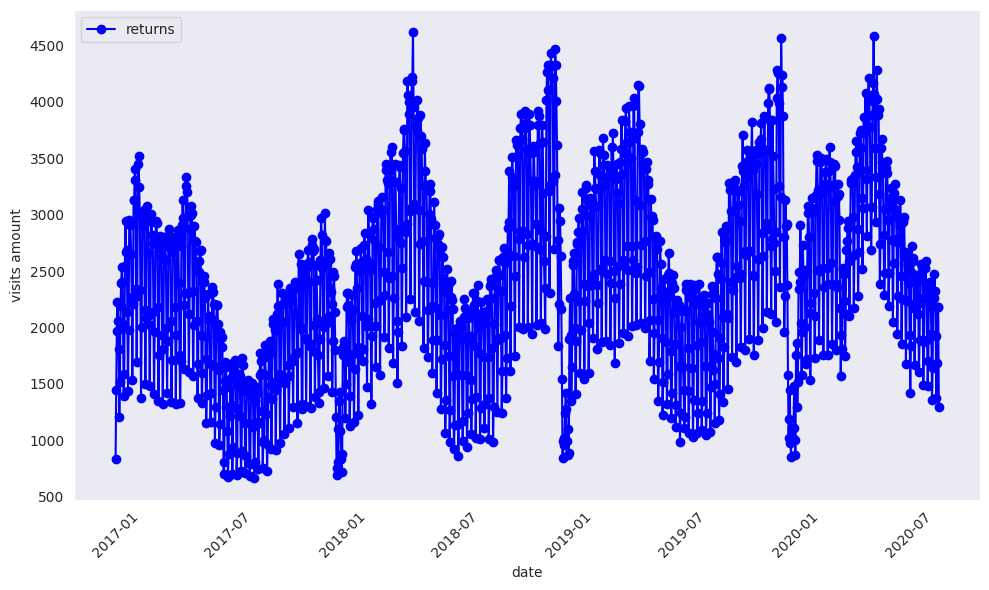

In [155]:
# df['price'] = predictions_new.astype(int)
df = df.sort_values(by='Date')

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['First.Time.Visits'], marker='o', label='returns', color='blue')
plt.xlabel('date')
plt.ylabel('visits amount')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

## LINREG

In [162]:
# уберем данные на 8 месяц, чтобы предсказать их при помощи модели
df_sample = df[(df['Date'].dt.month == 8) & (df['Date'].dt.year == 2020)]
df_train = df.drop(df_sample.index).reset_index(drop=True)
df_sample = df_sample.reset_index(drop=True)

In [165]:
from sklearn.model_selection import train_test_split

In [166]:
X = df_train.drop(['Returning.Visits', 'Date'], axis=1)
y = df_train['Returning.Visits']

# Разделяем данные на обучающую и тестовую выборки (70% на обучение, 30% на тестирование)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Добавим константу в обучающие данные
X_train = sm.add_constant(X_train)

# Обучение модели методом наименьших квадратов
model = sm.OLS(y_train, X_train).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Returning.Visits   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.054e+31
Date:                Wed, 11 Dec 2024   Prob (F-statistic):               0.00
Time:                        14:00:09   Log-Likelihood:                 24161.
No. Observations:                 915   AIC:                        -4.831e+04
Df Residuals:                     911   BIC:                        -4.829e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.656e-12   9.62e-1

In [167]:
alpha = float(input("Введите уровень значимости (например, 0.05): "))
significant_factors = model.pvalues[model.pvalues < alpha].index.tolist()
print(f"\nЗначимые факторы по уровню значимости {alpha}: {significant_factors}")

# отбор значимых факторов по коэффициенту корреляции (основываясь на обучающей выборке)
temp = X_train.drop('const', axis=1)
correlation_matrix = temp.corrwith(y_train)
print("\nКоэффициенты корреляции с Returning.Visits:")
print(correlation_matrix)

# оценка адекватности модели
R_squared = model.rsquared
print(f"\nКоэффициент детерминации R^2: {R_squared}")

# RMSE на тесте
X_test = sm.add_constant(X_test)
predictions_test = model.predict(X_test)
rmse = mean_squared_error(y_test, predictions_test, squared=False)
print(f"\nRMSE на тестовых данных: {rmse}")

# F-статистика
f_statistic = model.fvalue
print(f"F-статистика: {f_statistic}")

# Проверка адекватности модели
if model.f_pvalue < alpha:
    print("Модель адекватна.")
else:
    print("Модель неадекватна.")

Введите уровень значимости (например, 0.05): 0.05

Значимые факторы по уровню значимости 0.05: ['const', 'Page.Loads', 'Unique.Visits', 'First.Time.Visits']

Коэффициенты корреляции с Returning.Visits:
Page.Loads           0.919558
Unique.Visits        0.897078
First.Time.Visits    0.857621
dtype: float64

Коэффициент детерминации R^2: 1.0

RMSE на тестовых данных: 8.246671172572044e-13
F-статистика: 1.0543045622704818e+31
Модель адекватна.


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Оценка

In [171]:
X_new = df_sample.drop(['Date', 'Returning.Visits'], axis=1, errors='ignore')
X_new = sm.add_constant(X_new)

X_new

,const,Page.Loads,Unique.Visits,First.Time.Visits
0,1.0,2305.0,1750.0,1479.0
1,1.0,2696.0,1993.0,1701.0
2,1.0,3866.0,2814.0,2368.0
3,1.0,3826.0,2845.0,2400.0
4,1.0,3673.0,2774.0,2334.0
5,1.0,3660.0,2625.0,2189.0
6,1.0,3136.0,2364.0,1941.0
7,1.0,2223.0,1628.0,1354.0
8,1.0,2623.0,1941.0,1644.0
9,1.0,3638.0,2745.0,2325.0


In [172]:
# Выполнение предсказания для новых данных
predictions_new = model.predict(X_new)

# Выводим предсказания
print("\nПредсказания для новых данных:")
print(predictions_new.astype(int))

# Сохраняем вывод результатов в текстовый файл
output_file = 'output_results.txt'
with open(output_file, 'w') as f:
    f.write(str(predictions_new))


Предсказания для новых данных:
0     270
1     291
2     446
3     445
4     440
5     436
6     422
7     273
8     296
9     420
10    484
11    427
12    458
13    386
14    322
15    350
16    457
17    499
18    266
dtype: int64


In [173]:
df_sample['Returning.Visits_pred'] = predictions_new.astype(int)
df_sample['Date'] = pd.to_datetime(df_sample['Date'])
selected_rows = df_sample.sort_values(by='Date')

In [174]:
selected_rows

,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits,Returning.Visits_pred
0,2020-08-01,2305.0,1750.0,1479.0,271,270
1,2020-08-02,2696.0,1993.0,1701.0,292,291
2,2020-08-03,3866.0,2814.0,2368.0,446,446
3,2020-08-04,3826.0,2845.0,2400.0,445,445
4,2020-08-05,3673.0,2774.0,2334.0,440,440
5,2020-08-06,3660.0,2625.0,2189.0,436,436
6,2020-08-07,3136.0,2364.0,1941.0,423,422
7,2020-08-08,2223.0,1628.0,1354.0,274,273
8,2020-08-09,2623.0,1941.0,1644.0,297,296
9,2020-08-10,3638.0,2745.0,2325.0,420,420


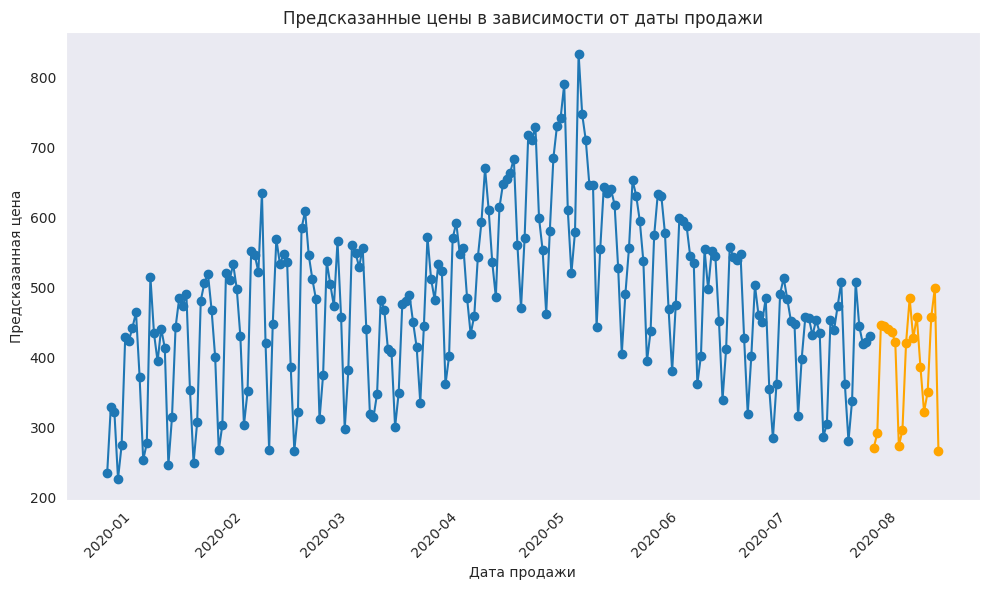

In [177]:
df_temp = df_train[(df_train['Date'].dt.year == 2020)]

plt.figure(figsize=(10, 6))
plt.plot(df_temp['Date'], df_temp['Returning.Visits'], marker='o')
plt.plot(df_sample['Date'], selected_rows['Returning.Visits_pred'], marker='o', color='orange')
plt.title('Предсказанные цены в зависимости от даты продажи')
plt.xlabel('Дата продажи')
plt.ylabel('Предсказанная цена')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [176]:
selected_rows.to_csv('data.csv')

## BONUS

In [179]:
lagged_periods = 3  # Значения lag для добавления
for lag in range(1, lagged_periods + 1):
    df[f'Returning.Visits_Lag_{lag}'] = df['Returning.Visits'].shift(lag)

df.dropna(inplace=True)

# Фильтруем данные по дате
df_sample = df[(df['Date'].dt.month == 8)]
df_train = df.drop(df_sample.index).reset_index(drop=True)

# Определение предикторов и отклика
X_train = df_train.drop(['Returning.Visits', 'Date'], axis=1)
y_train = df_train['Returning.Visits']
temp = df_train.drop(['Date'], axis=1)

# Добавление константы для модели
X_train = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Returning.Visits   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.692e+29
Date:                Wed, 11 Dec 2024   Prob (F-statistic):               0.00
Time:                        14:07:04   Log-Likelihood:                 29649.
No. Observations:                1209   AIC:                        -5.928e+04
Df Residuals:                    1202   BIC:                        -5.925e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   2.79

In [180]:
# Оценка значимых факторов и корреляций
alpha = float(input("Введите уровень значимости (например, 0.05): "))
significant_factors = model.pvalues[model.pvalues < alpha].index.tolist()
print(f"\nЗначимые факторы по уровню значимости {alpha}: {significant_factors}")

# Отбор значимых факторов по коэффициенту корреляции
correlation_matrix = temp.corr()
print("\nКоэффициенты корреляции с Returning.Visits:")
print(correlation_matrix['Returning.Visits'])

# Оценка адекватности модели
R_squared = model.rsquared
print(f"\nКоэффициент детерминации R^2: {R_squared}")

# Вычисление RMSE
predictions = model.predict(X_train)
rmse = mean_squared_error(y_train, predictions, squared=False)
print(f"\nRMSE: {rmse}")

# Оценка F-статистики
f_statistic = model.fvalue
print(f"F-статистика: {f_statistic}")

# Проверка адекватности модели
if model.f_pvalue < alpha:
    print("Модель адекватна.")
else:
    print("Модель неадекватна.")

Введите уровень значимости (например, 0.05): 0.05

Значимые факторы по уровню значимости 0.05: ['const', 'Unique.Visits', 'First.Time.Visits']

Коэффициенты корреляции с Returning.Visits:
Page.Loads                0.920164
Unique.Visits             0.897982
First.Time.Visits         0.857345
Returning.Visits          1.000000
Returning.Visits_Lag_1    0.696674
Returning.Visits_Lag_2    0.273410
Returning.Visits_Lag_3    0.087663
Name: Returning.Visits, dtype: float64

Коэффициент детерминации R^2: 1.0

RMSE: 5.409872925708407e-12
F-статистика: 1.6917057996737224e+29
Модель адекватна.


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [181]:
# Подготовка данных для новых предсказаний
X_new = df_sample.copy()
for lag in range(1, lagged_periods + 1):
    X_new[f'Returning.Visits_Lag_{lag}'] = X_new['Returning.Visits'].shift(lag)

X_new = X_new.drop(['Date', 'Returning.Visits'], axis=1, errors='ignore')
# Удаление NA после создания лагов для X_new
X_new.dropna(inplace=True)

X_new = sm.add_constant(X_new)

# Выполнение предсказания для новых данных
predictions_new = model.predict(X_new)

# Вывод предсказаний
print("\nПредсказания для новых данных:")
print(predictions_new.astype(int))

# Сохранение результатов
df_sample['Returning.Visits_pred'] = predictions_new.astype(int)
df_sample['Date'] = pd.to_datetime(df_sample['Date'])
selected_rows = df_sample.sort_values(by='Date')


Предсказания для новых данных:
215     328
216     220
217     253
218     425
219     453
       ... 
1322    323
1323    351
1324    457
1325    499
1326    267
Length: 109, dtype: int64


<ipython-input-181-eff4904799f5>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample['Returning.Visits_pred'] = predictions_new.astype(int)
<ipython-input-181-eff4904799f5>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample['Date'] = pd.to_datetime(df_sample['Date'])


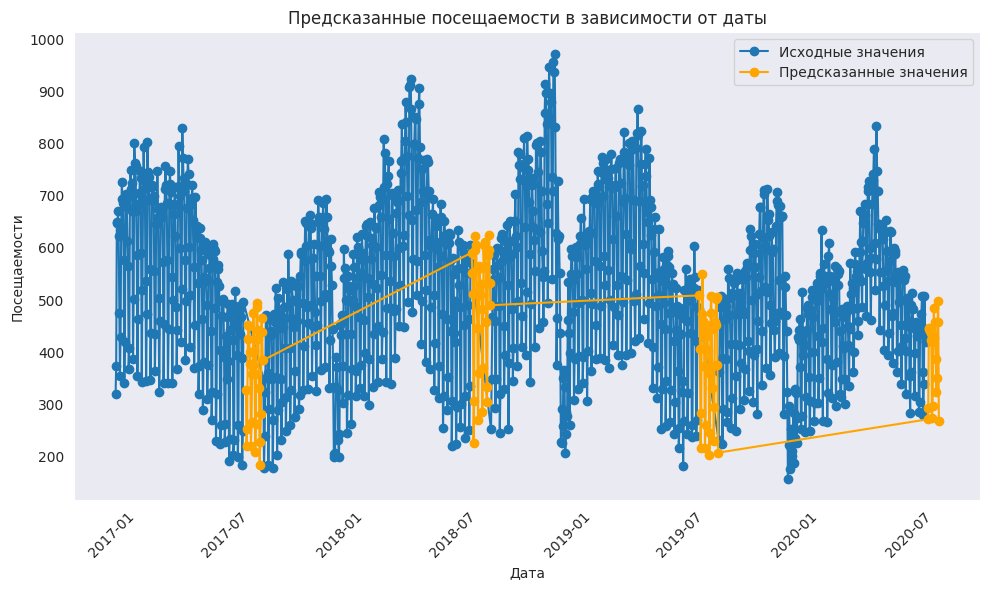

In [188]:
plt.figure(figsize=(10, 6))
plt.plot(df_train['Date'], df_train['Returning.Visits'], marker='o', label='Исходные значения')
plt.plot(df_sample['Date'], selected_rows['Returning.Visits_pred'], marker='o', color='orange', label='Предсказанные значения')
plt.title('Предсказанные посещаемости в зависимости от даты')
plt.xlabel('Дата')
plt.ylabel('Посещаемости')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()